In [256]:
import numpy as np
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics

In [257]:
X = np.random.rand(100, 2)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

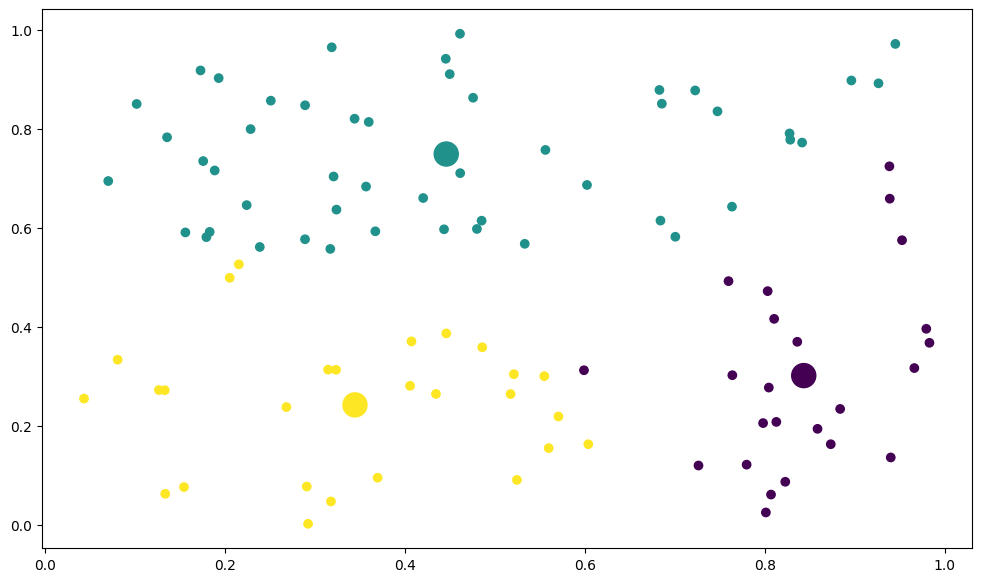

In [258]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0, 1, 2], s=300);

In [259]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1, random_state=0)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

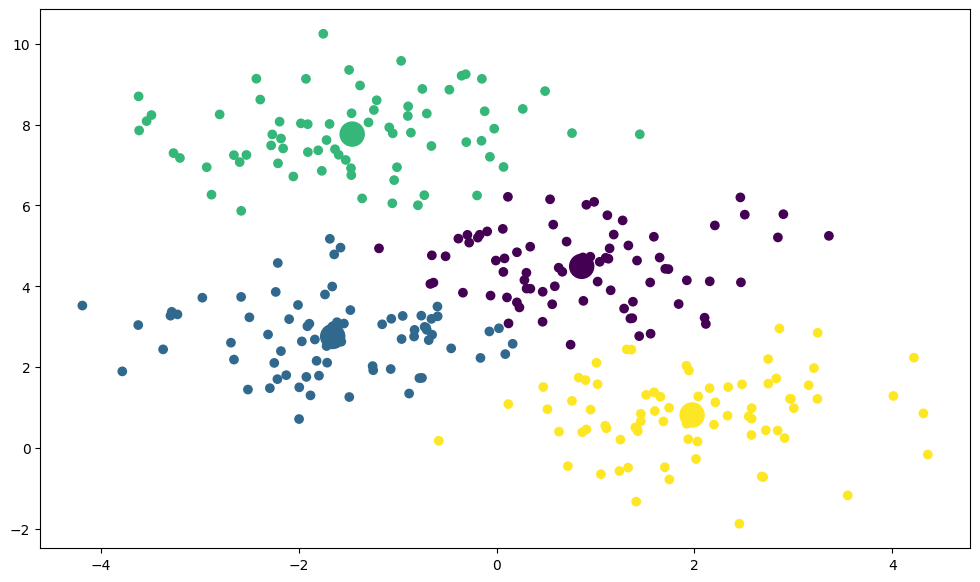

In [260]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0, 1, 2, 3], s=300);

In [261]:
centers = np.array([[1, 1], [-1, -1], [1, -1]])
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

af = AffinityPropagation().fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

print('Количество кластеров: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Количество кластеров: 15
Homogeneity: 0.901
Completeness: 0.374
V-measure: 0.528
Adjusted Rand Index: 0.243
Adjusted Mutual Information: 0.515
Silhouette Coefficient: 0.476


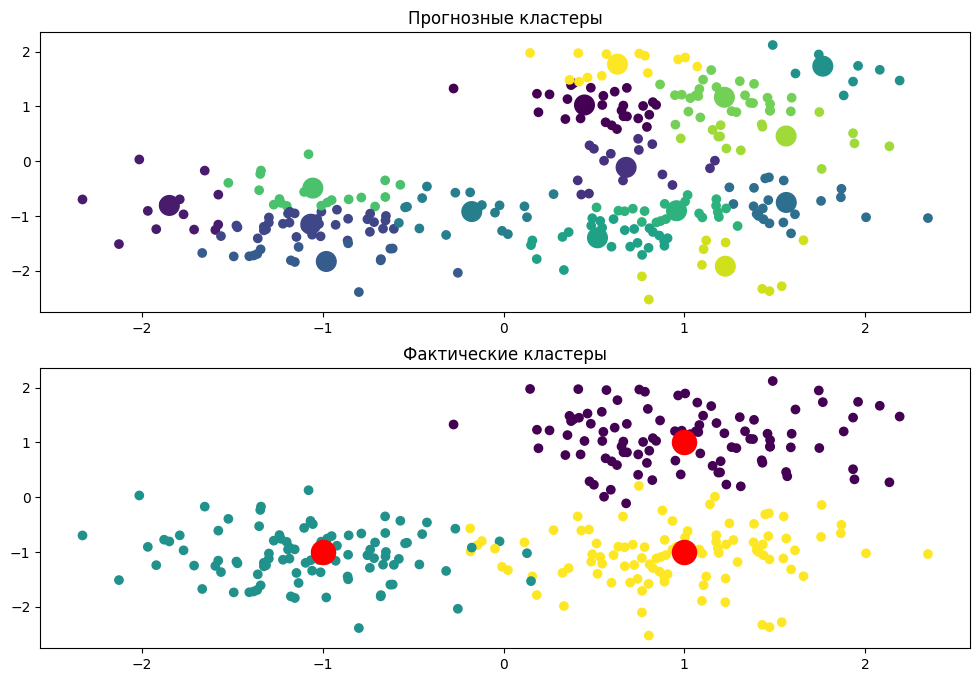

In [262]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].scatter(X[:, 0], X[:, 1], c=labels)
axs[0].scatter(af.cluster_centers_[:, 0], af.cluster_centers_[:, 1], c=list(range(n_clusters_)), s=200)
axs[0].set_title('Прогнозные кластеры')
axs[1].scatter(X[:, 0], X[:, 1], c=labels_true)
axs[1].scatter(centers[:, 0], centers[:, 1], c='red', s=300)
axs[1].set_title('Фактические кластеры');

In [263]:
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=0)

dbscan = DBSCAN(eps=0.7, min_samples=5)
clusters = dbscan.fit_predict(X)

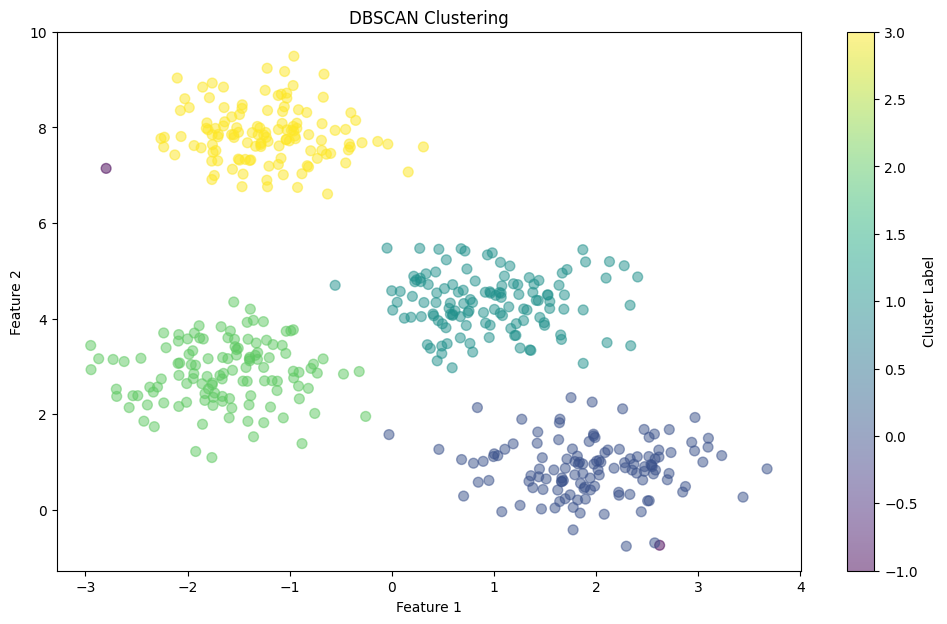

In [264]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label');